In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from keras.preprocessing import image

import matplotlib.image as mpimg
plt.rcParams.update({'figure.max_open_warning': 0})

Using TensorFlow backend.


In [2]:
train_dir = './train/train/'
validation_dir = './validation/validation/'
test_dir = './test/test/'

In [3]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)  
test_datagen = ImageDataGenerator(rescale=1. / 255)  


In [4]:
df = pd.read_csv("./trainingset_v1d1_metadata.csv") 
df.label.value_counts()

Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Low_Frequency_Lines     447
Extremely_Loud          447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
1400Ripples              81
None_of_the_Above        81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: label, dtype: int64

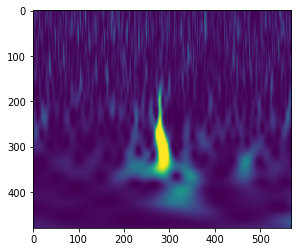

In [5]:
fullpath = train_dir + 'Blip/' + os.listdir(train_dir + 'Blip')[0]
img=mpimg.imread(fullpath)
plt.imshow(img)


In [6]:
classes_list = df.label.value_counts().index
classes_list = list(classes_list)

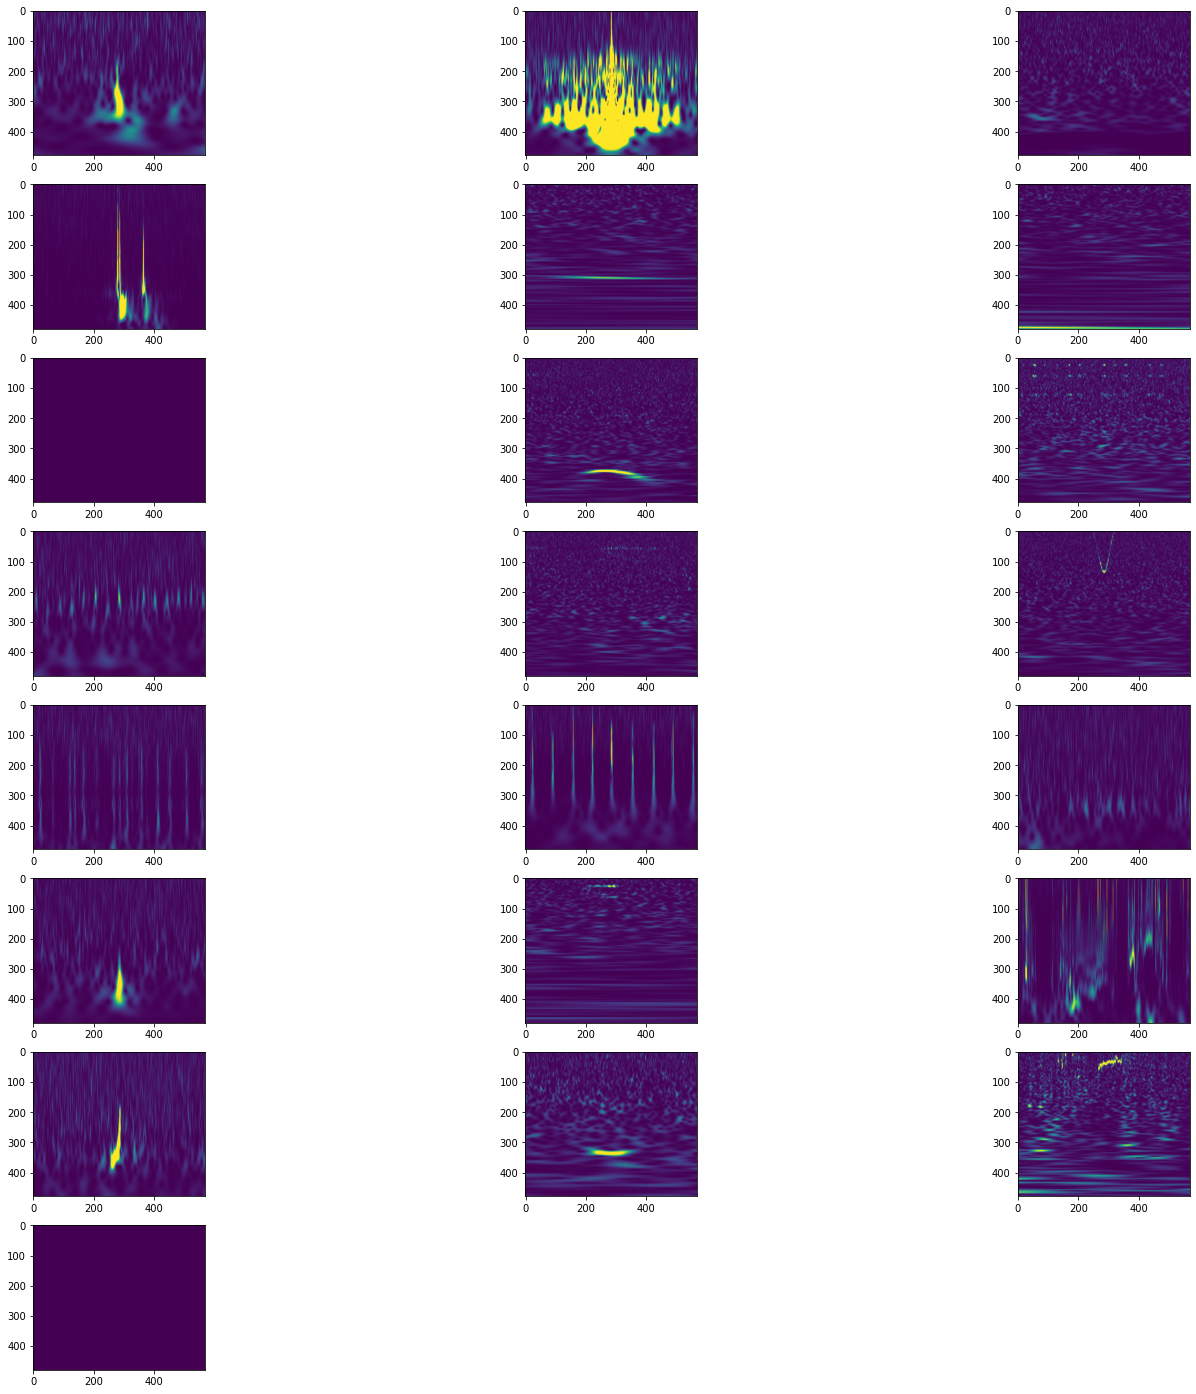

In [7]:
plt.figure(figsize=(25, 25))
    
for i in range(0, 22):
    plt.subplot(8, 3, i+1)
    fullpath = train_dir + classes_list[i] + '/' + os.listdir(train_dir + classes_list[i])[0]
    img=mpimg.imread(fullpath)
    plt.imshow(img)


In [8]:
training_batch_size = 64
validation_batch_size = 32
img_dim = 250

train_generator = train_datagen.flow_from_directory(
  train_dir,                                                  
  classes = classes_list,
  target_size = (img_dim, img_dim),            
  batch_size = training_batch_size,
  class_mode = "categorical",
  shuffle = True,
  seed = 123)

Found 8996 images belonging to 22 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(
  validation_dir,
  classes = classes_list,
  target_size = (img_dim, img_dim),
  batch_size = validation_batch_size,
  class_mode = "categorical",
  shuffle = True,
  seed = 123)

Found 4355 images belonging to 22 classes.


In [10]:
test_size = !find './test/test/' -type f | wc -l
test_size = int(test_size[0])
test_batch_size = 1

test_generator = test_datagen.flow_from_directory(
  test_dir,
  classes = classes_list,
  target_size = (img_dim, img_dim),
  batch_size = test_batch_size,
  class_mode = "categorical",
  shuffle = False)

Found 2836 images belonging to 22 classes.


In [11]:
input_shape = (img_dim, img_dim, 3)

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (10, 10), input_shape=input_shape))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(32, (5, 5)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(img_dim, activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(22, activation="softmax"))


In [13]:
model.compile(loss = "categorical_crossentropy",  
              optimizer = 'adam', 
              metrics=["accuracy"])

training_step_size = 32
validation_step_size = 32

history = model.fit_generator(
  train_generator,
  steps_per_epoch = training_step_size,
  epochs = 40,
  validation_data = validation_generator,
  validation_steps = validation_step_size,
  verbose = 1)

Epoch 1/40
32/32 [==============================] - 141s 4s/step - loss: 0.1279 - accuracy: 0.9683 - val_loss: 0.6805 - val_accuracy: 0.8535
Epoch 2/40
32/32 [==============================] - 141s 4s/step - loss: 0.1287 - accuracy: 0.9644 - val_loss: 0.5726 - val_accuracy: 0.8789
Epoch 3/40
32/32 [==============================] - 141s 4s/step - loss: 0.1163 - accuracy: 0.9717 - val_loss: 0.5858 - val_accuracy: 0.8623
Epoch 4/40
32/32 [==============================] - 140s 4s/step - loss: 0.0908 - accuracy: 0.9766 - val_loss: 0.5760 - val_accuracy: 0.8809
Epoch 5/40
32/32 [==============================] - 139s 4s/step - loss: 0.0851 - accuracy: 0.9777 - val_loss: 0.7328 - val_accuracy: 0.8633
Epoch 6/40
32/32 [==============================] - 141s 4s/step - loss: 0.0879 - accuracy: 0.9756 - val_loss: 1.0294 - val_accuracy: 0.8271
Epoch 7/40
32/32 [==============================] - 141s 4s/step - loss: 0.1181 - accuracy: 0.9668 - val_loss: 0.7031 - val_accuracy: 0.8770
Epoch 8/40
32

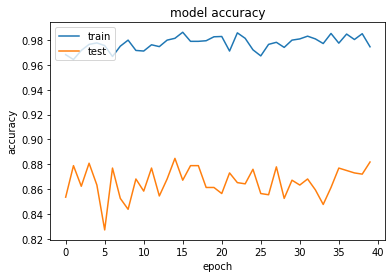

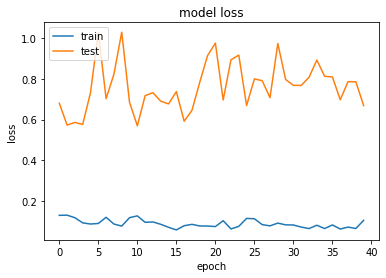

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
predictions = model.predict_generator(test_generator, steps = test_size, verbose = 1)

Instructions for updating:
Please use Model.predict, which supports generators.
2836/2836 [==============================] - 46s 16ms/step


In [16]:
df = pd.DataFrame(predictions)
df['filename'] = test_generator.filenames
df['truth'] = ''
df['truth'] = df['filename'].str.split('/', 1, expand = True)
df['prediction_index'] = df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].idxmax(axis=1)

df['prediction'] = ''

for i in range(0,22):
    df['prediction'][df['prediction_index'] == i] = classes_list[i]
    
cm = confusion_matrix(df['truth'], df['prediction'])

cm_df = pd.DataFrame(cm)

cm_df.columns = classes_list
cm_df['signal'] = classes_list

cm_df

<ipython-input-16-78398cecd96a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'][df['prediction_index'] == i] = classes_list[i]


,Blip,Koi_Fish,Low_Frequency_Burst,Light_Modulation,Power_Line,Low_Frequency_Lines,Extremely_Loud,Scattered_Light,Violin_Mode,Scratchy,...,Repeating_Blips,No_Glitch,Tomte,1400Ripples,None_of_the_Above,Chirp,Air_Compressor,Wandering_Line,Paired_Doves,signal
0,182,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4,Blip
1,0,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Koi_Fish
2,0,0,32,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,Low_Frequency_Burst
3,0,0,0,218,0,0,2,1,2,1,...,0,0,10,0,1,1,0,0,0,Light_Modulation
4,0,0,0,0,35,0,0,0,0,0,...,0,0,1,0,3,0,0,0,0,Power_Line
5,0,0,0,0,0,152,0,50,2,0,...,0,0,0,0,0,0,0,0,0,Low_Frequency_Lines
6,0,0,0,0,0,0,166,0,0,0,...,0,0,0,0,0,0,0,0,0,Extremely_Loud
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Scattered_Light
8,0,0,0,0,0,0,0,4,273,2,...,0,0,18,0,0,0,0,0,0,Violin_Mode
9,0,0,0,0,0,0,0,0,2,4,...,0,0,0,0,0,0,0,0,0,Scratchy


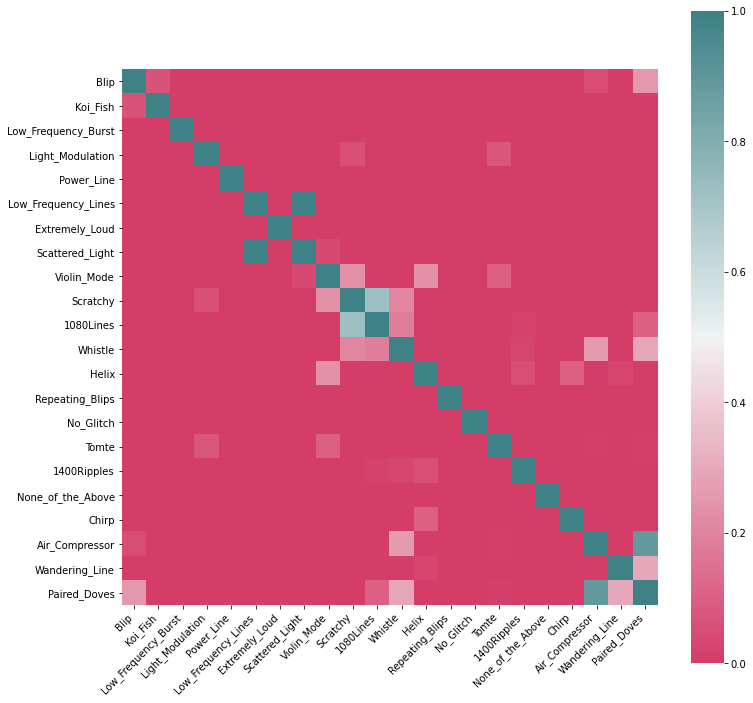

In [18]:
import seaborn as sns

plt.figure(figsize=(12, 12))

corr = cm_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0.5,
    cmap=sns.diverging_palette(0, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [19]:
accuracy = accuracy_score(df['truth'], df['prediction'])
accuracy

0.8811706629055007